# ADALINEの入出力を計算する（順伝搬）
 以下は、28×28 のmnist手書き数字データを1件、変数xに読み込むプログラム。
  
・出力データzoutは、何行何列の行列か？ 
・変数x,wにもとづき、zin, zoutを計算して結果をzoutに出力して表示せよ。なお、計算は、for文でxを1行づつ処理するコーディングと、numpy.dotで一辺に処理するコーディングの2通りで書くこと。 
numpy.dotによる内積計算は以下を参照  
https://qiita.com/ao_log/items/64768b67153e8fb6820b

In [2]:
import numpy as np
import pandas as pd
df_mnist = pd.read_csv('mnist2000.csv', header=None)
x = df_mnist.iloc[0,1:].values
wm = np.ones(784)/784


In [5]:
zin=0
for r,w in zip(x,wm):
    zin+=r*w
    zout=zin
print(zout)

23.53826530612246


In [6]:
zin=np.dot(x,wm)
zout=zin
print(zout)

23.538265306122447


# 複数のデータセットの順伝搬
 以下は、28×28 のmnist手書き数字データを10件、変数xに読み込むプログラム。以下の問いに答えよ。  
・xは何行何列の行列か？  
・出力データzoutは、何行何列の行列か？ 
・変数x,wにもとづき、zin, zoutを計算して結果をzoutに出力して表示せよ。なお、計算は、for文でxを1行づつ処理するコーディングと、numpyブロードキャストで一辺に処理するコーディングの2通りで書くこと。 
numpyブロードキャストによる行列計算は以下を参照  
https://qiita.com/ao_log/items/64768b67153e8fb6820b

In [ ]:
import numpy as np
import pandas as pd
df_mnist = pd.read_csv('mnist2000.csv', header=None)
x = df_mnist.iloc[:10,1:].values
wm = np.ones(784)/784
zin = np.zeros(len(x))
zout = np.zeros(len(x))

## 解１

In [ ]:
for i,row in enumerate(x):
    for r,w in zip(row,wm):
        zin[i]+=r*w
        zout=zin
print(zout)

## 解２

In [ ]:
zin =np.dot(x,wm)
zout = zin
print(zout)

# 誤差二乗和の計算 
1. スライドに示した予測値１と教師データとの誤差二乗和を計算せよ(numpy ブロードキャストを使うこと）
2. 同様にスライドの予測値２と教師データとの誤差二乗和を計算せよ
3. 予測値１，２どちらが、予測性能がよいと言えるか
4. 上記、ADALINEの入出力において、まったく同じxを入力したとしたときに、異なる予測値１，２が得られるとすると、何が原因と考えられるか？

In [ ]:
z1 = np.array([0.8,0.2,0.1,0.5,0.3,0.7])
z2= np.array([0.5,0.3,0.8, 0.2, 0.9,0.2])
t=np.array([1, 0, 1, 1, 0, 1])

sq1 = np.sum((z1-t)**2)
sq2 = np.sum((z2-t)**2)
print(sq1,sq2)

# ADLINEへの手書き数字入力による誤差二乗和の計算  
以下は、784次元グレースケール手書き数字特徴量をxに読み込み、教師データtには、xの手書きが数字２ならば１、それ以外の数字なら０を要素として書き込んでいる。このデータをもとに、誤差二乗和を計算せよ。（ヒント：最初の問題の答えと、tとの誤差二乗和を計算する） 
なお、wmはあらかじめ分かっているものとする（以下のwmを用いること）

In [1]:
import numpy as np
import pandas as pd
import random

df_mnist = pd.read_csv('mnist2000.csv', header=None)

df_mnist.iloc[:,0][df_mnist.iloc[:,0]!=2]=0
df_mnist.iloc[:,0][df_mnist.iloc[:,0]==2]=1
df_two = df_mnist[df_mnist.iloc[:,0]==1]
df_not_two = df_mnist[df_mnist.iloc[:,0]==0]
dataset1 = df_two.iloc[:10,:].values
dataset2 = df_not_two.iloc[:10,:].values
dataset=np.concatenate([dataset1, dataset2], 0)
np.random.shuffle(dataset)
np.set_printoptions(threshold=100000)
t = dataset[:,0]
x = dataset[:,1:]
print(x.shape)

wm = np.ones(784)/784
zin = np.zeros(len(x))
zout = np.zeros(len(x))

(20, 784)


# 一応データを確認  
xの要素をグレースケール表示。t:に教師データを表示（２なら１，2以外は０になっている）

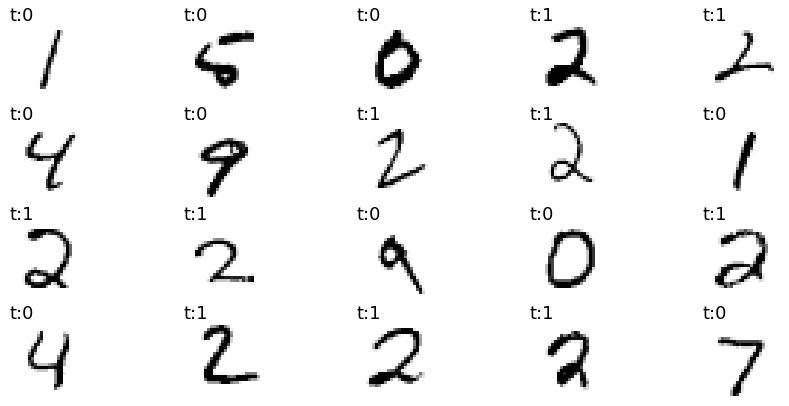

In [2]:
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 15,7

fig=plt.figure()

for i,(xx,tt) in enumerate(zip(x,t)):

    image_array=np.asfarray(xx).reshape((28,28))
    ax = fig.add_subplot(4,5,i+1)
    ax.imshow(image_array,cmap='Greys',interpolation='None')
    ax.axis("off")   
    ax.text(0.4,0.4, 't:'+ str(tt) , size = 18,linespacing = 2)

plt.show()

In [3]:
zin =np.dot(x,wm)
zout = zin
sq = np.sum((zout-t)**2)
print(sq)

19849.612554013933


# 勾配降下法による関数の最小化
スライドのJを最小化するwの値をもとめるプログラムを書け。(J'=0よりw=-0.25のときに最小化する。これと勾配降下法の答えが一致するはず)
wの初期値を1000, wの学習率α=0.1 収束判定条件　勾配<0.01 とする。 
ヒント：ループにwhile Ture: を使う。収束判定条件を満たしたらbreakして、wを表示する

In [5]:
w = 1000
while True:
    w_delta = 4*w+1
    w = w - 0.1*w_delta
    if w_delta < 0.01:
        break
print(w)

-0.24897625375833027


# ADALINEのウエイトを勾配降下法で求める  
以下は、0-126 のグレーに対して、1　127-256のグレーに対して、0 を教師ラベルにする（黒っぽければ１、白っぽければ０）データを生成するプログラムである。xには、グレーのデータが１００個ランダムに入っている。まず、xを標準化せよ。（標準化後の変数もxとする）

複数の変数を同期しながらシャッフルする方法
https://dlrecord.hatenablog.com/entry/2017/11/28/194512

In [6]:
import random
import numpy as np
x1=[random.randrange(0, 126, 1) for i in range(50)]
t1=[1 for i in range(50)]
x2=[random.randrange(127, 255, 1) for i in range(50)]
t2=[0 for i in range(50)]
x=x1+x2
t=t1+t2
zipped = list(zip(x,t))
np.random.shuffle(zipped)
x, t = zip(*zipped)
x=np.array(x)



In [7]:
mean=np.mean(x)
var = np.var(x)
x=(x-mean)/var

t=np.array(t)

print(t)

[0 1 1 0 1 0 1 0 1 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 0 1 1 0 0 1 1 0 0 0 1 0 1
 0 0 1 1 0 0 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 0 1 0 1 1 0 0 0 1 1 0 1 0 0 0 0
 1 0 1 1 0 0 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0 1 0 0 0 0]


上記のx,tにもとづき、スライドのアルゴリズムのとおり、ADALINEのウエイトw0,w1を勾配降下法で推定せよ
（以下の通り10,000回勾配降下した結果を表示せよ）

In [8]:
w0 = 0.5
w1 = 0.1
for i in range(10000):
    w0_delta = 2*np.sum(((w0+x*w1)-t))
    w1_delta = 2*np.sum(((w0+x*w1)-t)*x)
    w0 = w0 - 0.01*w0_delta
    w1 = w1 - 0.01*w1_delta
    
print(w0,w1)

0.5 -31.563172107117776


学習済ADALINEに、以下の値を入力して予測値を表示せよ（標準化すること）   
  x_test=[0,120,180,255]  
予測値は当たっていると言えるか、評価せよ

In [15]:
x_test=[0,120,180,255]
x_test=(x_test-mean)/var
zout = w0+w1*x_test
print(zout)


[ 2.89117894  0.13532997 -1.24259452 -2.96500012]


以下を実行して何を表示しているのか答えよ

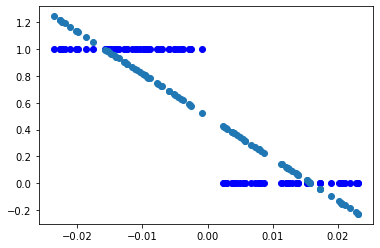

In [9]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot()
ax.scatter(x,t, c='blue')
ax.scatter(x,w0+w1*x)

plt.show()

gをシグモイド関数として、ADALINEのw0, w1を勾配降下法で推定せよ（x,tは上記と同じデータ）

In [17]:
def sigmoid(w0,w1,x):
    g=1/(1+np.exp(-(w0+x*w1)))
    return g
    

w0 = 0.5
w1 = 0.1
for i in range(10000):
    g=sigmoid(w0,w1,x)
    w0_delta = 2*np.sum((g-t)*(1-g)*g)
    w1_delta = 2*np.sum((g-t)*(1-g)*g*x)
    w0 = w0 - 0.1*w0_delta
    w1 = w1 - 0.1*w1_delta
    
print(w0,w1)

-0.010041064752237065 -122.05382031739794


学習済ADALINEに、以下の値を入力して予測値を表示せよ（標準化すること）   
  x_test=[0,120,180,255]  
予測値は当たっていると言えるか、評価せよ

In [18]:
x_test=[0,120,180,255]
x_test=(x_test-mean)/var
zout=sigmoid(w0,w1,x_test)
print(zout)


[0.94740865 0.53378095 0.2239847  0.04903233]


モデルの表現力を確かめる

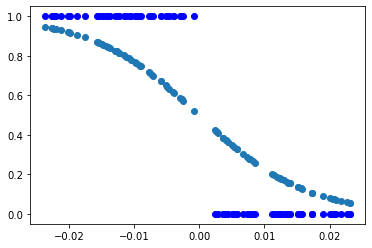

In [11]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot()
ax.scatter(x,t, c='blue')
ax.scatter(x,sigmoid(w0,w1,x))

plt.show()

# 28x28ピクセル手書き数字を判別するADALINE  
教師データは、手書き数字が２なら1, ２でなければ０とする。  
データセットは、２のデータを100サンプル、2以外のデータを100サンプル  


In [27]:
import numpy as np
import pandas as pd
import random

df_mnist = pd.read_csv('mnist2000.csv', header=None)

df_mnist.iloc[:,0][df_mnist.iloc[:,0]!=2]=0
df_mnist.iloc[:,0][df_mnist.iloc[:,0]==2]=1
df_two = df_mnist[df_mnist.iloc[:,0]==1]
df_not_two = df_mnist[df_mnist.iloc[:,0]==0]
dataset1 = df_two.iloc[:100,:].values
dataset2 = df_not_two.iloc[:100,:].values
dataset=np.concatenate([dataset1, dataset2], 0)
print(dataset.shape)
np.random.shuffle(dataset)
np.set_printoptions(threshold=100000)
t = dataset[:,0]
x = dataset[:,1:]
mean=np.mean(x)
var = np.var(x)
x=(x-mean)/var

wm = np.ones(784)/784
w0 = 0.5
zin = np.zeros(len(x))
zout = np.zeros(len(x))

(200, 785)


1. 100サンプルのデータxとウエイトw0,wmとの内積を一度に計算するコーディングをいかに書け（zinに結果を書き出す）  
2. 上記の計算結果をsigmoid関数で一度に計算するコーディングを書け  
3. Jのwmによる偏微分784回を一度に計算するコーディングを書け

In [28]:
import numpy as np
w0m=np.insert(wm, 0, w0)
x1=np.insert(x,0,1,axis=1)
zin=np.dot(x1,w0m)
print(zin.shape)

#以下は別解
zin=w0+np.dot(x,wm)


g=1/(1+np.exp(w0+np.dot(x,wm)))
print(g.shape)

delta_wm=np.sum((g-t)*(1-g)*g)*x.T
print(delta_wm.shape)

#別解
wm_delta = np.array([2*np.sum((g-t)*(1-g)*g*xm) for xm in x.T])
print(delta_wm.shape)

(200,)
(200,)
(784, 200)
(784, 200)


上記のウエイトが２つ(w0,w1)の場合のADALINEを拡張して、w0,wm(m:1-784)を学習するADALINEをコーディングせよ

In [29]:

def sigmoid(w0,wm,x):
    g=1/(1+np.exp(-(w0+np.dot(x,wm))))
    return g
#オーバーフローしたらこちらを使ってください。   
#def sigmoid(w0,wm,x):
#    g=w0+np.dot(x,wm)
#    return g

for i in range(1000):
    g=sigmoid(w0,wm,x)
   
    w0_delta = 2*np.sum((g-t)*(1-g)*g)
    wm_delta = np.array([2*np.sum((g-t)*(1-g)*g*xm) for xm in x.T])
    w0 = w0 - 0.01*w0_delta
    wm = wm - 0.01*wm_delta
    
print(w0,wm)

-0.7456616638934129 [ 8.03550167e-03  8.03550167e-03  8.03550167e-03  8.03550167e-03
  8.03550167e-03  8.03550167e-03  8.03550167e-03  8.03550167e-03
  8.03550167e-03  8.03550167e-03  8.03550167e-03  8.03550167e-03
  8.03550167e-03  8.03550167e-03  8.03550167e-03  8.03550167e-03
  8.03550167e-03  8.03550167e-03  8.03550167e-03  8.03550167e-03
  8.03550167e-03  8.03550167e-03  8.03550167e-03  8.03550167e-03
  8.03550167e-03  8.03550167e-03  8.03550167e-03  8.03550167e-03
  8.03550167e-03  8.03550167e-03  8.03550167e-03  8.03550167e-03
  8.03550167e-03  8.03550167e-03  8.03550167e-03  8.03550167e-03
  8.03550167e-03  8.03550167e-03  8.03550167e-03  8.03550167e-03
  8.03550167e-03  8.03550167e-03  8.03550167e-03  8.03550167e-03
  8.03550167e-03  8.03550167e-03  8.03550167e-03  8.03550167e-03
  8.03550167e-03  8.03550167e-03  8.03550167e-03  8.03550167e-03
  8.03550167e-03  8.03550167e-03  8.03550167e-03  8.03550167e-03
  8.03550167e-03  8.03550167e-03  8.03550167e-03  8.03550167e-03
  8.0

以下のx_testは、手書き２のサンプル５つ、手書き２でないサンプル５つを要素とする配列である。t_testはそれに対応する  
教師データ[1 1 1 1 1 0 0 0 0 0]である。  
上記で学習済のウエイトw0,wmを用いて、x_testから予測値zoutを計算し、教師データに近い値になるかどうかを確認せよ

In [30]:
dataset3 = df_two.iloc[:5,:].values
dataset4 = df_not_two.iloc[:5,:].values
test_data=np.concatenate([dataset3, dataset4], 0)
print(test_data.shape)
np.set_printoptions(threshold=100000)
t_test = test_data[:,0]
print(t_test)
img_x = test_data[:,1:]
mean=np.mean(img_x)
var = np.var(img_x)
x_test=(img_x-mean)/var




(10, 785)
[1 1 1 1 1 0 0 0 0 0]


In [31]:
y = sigmoid(w0,wm,x_test)
print(y)

[0.82926379 0.93745492 0.69091079 0.62245737 0.75204113 0.16379562
 0.42547854 0.17489991 0.19749053 0.44487965]
